# Univariate and multivariate models: My own KNN model vs Scikit-Learn's KNN model and Multivariate Linear Regression Model 
# on Sacramento dataset 

In [174]:
#library importing

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from haversine import haversine, Unit
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from collections import Counter

In [176]:
#dataset importing and the firts look

In [6]:
df = pd.read_csv("sacramento(1).csv")

In [5]:
df

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768
...,...,...,...,...,...,...,...,...,...,...,...,...
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424


In [178]:
#checking null values and data types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


## Distance Matrix by using Haversine

In [181]:
#symmetrical distance matrix

In [13]:
def set_distance_matrix(data):
    distance_matrix = np.zeros((985,985))
    for i in range(985):
        for j in range(i,985):
            city1 = (df.loc[i,'latitude'],df.loc[i,'longitude'])
            city2 = (df.loc[j,'latitude'],df.loc[j,'longitude'])
            distance = haversine(city1,city2)
            distance_matrix[i][j] = distance
            distance_matrix[j][i] = distance 
    return distance_matrix

In [183]:
#using function and converting normal array to numpy array

In [15]:
distance_matrix = set_distance_matrix(df)
distance_matrix = np.array(distance_matrix)
distance_matrix

array([[ 0.        , 17.01736543,  1.70160188, ..., 17.66763449,
        24.11837412, 31.28320983],
       [17.01736543,  0.        , 15.54091223, ..., 29.71362129,
         7.47945567, 36.5744056 ],
       [ 1.70160188, 15.54091223,  0.        , ..., 19.10556801,
        22.74545318, 32.21953717],
       ...,
       [17.66763449, 29.71362129, 19.10556801, ...,  0.        ,
        34.67633526, 16.79370402],
       [24.11837412,  7.47945567, 22.74545318, ..., 34.67633526,
         0.        , 38.52026705],
       [31.28320983, 36.5744056 , 32.21953717, ..., 16.79370402,
        38.52026705,  0.        ]])

# Train, Test | Split

In [19]:
X = df[['latitude', 'longitude']]
y = df['price']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# My own KNN model

In [187]:
#MertKNN object, it has a prediction and error calculator function.

In [105]:
class MertKNN():
    def __init__(self, distance_matrix, y_train, N=5):
        self.N = N
        self.distance_matrix = distance_matrix
        self.y_train = y_train.reset_index(drop=True)
    def Mertpredict(self, test_index):
        distances = self.distance_matrix[:, test_index]
        nearest_neighbors = np.argsort(distances)[:self.N]
        return self.y_train.iloc[nearest_neighbors].mean()
    def MertcalcError(self, test_index, y_test):
        predictions = [self.Mertpredict(i) for i in test_indices]
        mae = mean_absolute_error(y_test, predictions)
        rmse = np.sqrt(mean_squared_error(y_test, predictions))
        return mae, rmse

In [81]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [83]:
train_indices = X_train.index  # Indices of training rows
test_indices = X_test.index    # Indices of testing columns

# Slice the full distance matrix: rows (train_indices), columns (test_indices)
distance_matrix_train_test = distance_matrix[np.ix_(train_indices, test_indices)]

In [189]:
#Building the my model

In [85]:
mertknn = MertKNN(distance_matrix_train_test, y_train, N=3)

In [191]:
#Calculating MAE and RMSE with using my MertcalcError function

In [87]:
mae, rmse = mertknn.MertcalcError(distance_matrix_train_test, y_test=y_test)

In [89]:
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 125723.06
RMSE: 164916.73


## Calculating MAE and RMSE for a range of N values

In [194]:
#Neighbors 1 to 21 and error values

In [91]:
N_values = range(1, 21)
mae_values, rmse_values = [], []

In [196]:
#Getting MAE and RMSE for each N value

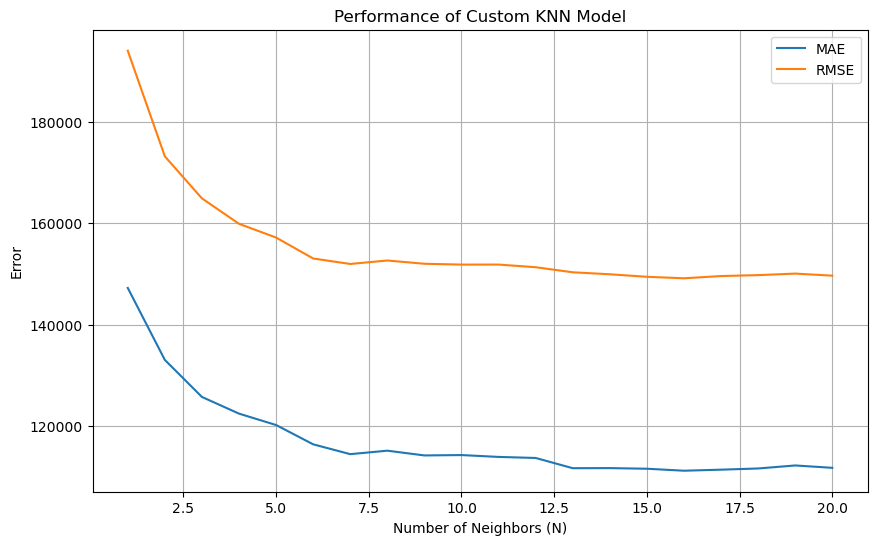

(16, 111158.6028293919, 149144.13740404352)

In [123]:
for N in N_values:
    knn_n = MertKNN(distance_matrix_train_test, y_train, N=N)
    mae, rmse = knn_n.MertcalcError(test_indices,y_test)
    mae_values.append(mae)
    rmse_values.append(rmse)

# Plot MAE and RMSE
plt.figure(figsize=(10, 6))
plt.plot(N_values, mae_values, label='MAE')
plt.plot(N_values, rmse_values, label='RMSE')
plt.xlabel('Number of Neighbors (N)')
plt.ylabel('Error')
plt.title('Performance of Custom KNN Model')
plt.legend()
plt.grid()
plt.show()
# Best N
best_N = N_values[np.argmin(mae_values)]
best_mae = min(mae_values)
best_rmse = rmse_values[np.argmin(mae_values)]
best_N, best_mae, best_rmse

# Scikit-Learn Model

## Train and Test | Split for univariate and multivariate models

In [130]:
X_univariate = df[['sq__ft']]
X_multivariate = df[['beds', 'baths', 'sq__ft', 'latitude', 'longitude']]
y = df['price']

In [132]:
X_uni_train, X_uni_test, y_train, y_test = train_test_split(X_univariate, y, test_size=0.2, random_state=42)
X_multi_train, X_multi_test, _, _ = train_test_split(X_multivariate, y, test_size=0.2, random_state=42)

### Scaling for uni and multivariate models

In [134]:
scaler_uni = StandardScaler()
X_uni_train_scaled = scaler_uni.fit_transform(X_uni_train)
X_uni_test_scaled = scaler_uni.transform(X_uni_test)

In [136]:
scaler_multi = StandardScaler()
X_multi_train_scaled = scaler_multi.fit_transform(X_multi_train)
X_multi_test_scaled = scaler_multi.transform(X_multi_test)

### Applying the Grid Search to both models

In [201]:
#Param grid. Again 1 to 21 neighbors

In [138]:
param_grid = {'n_neighbors': range(1, 21)}

In [140]:
knn_uni = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_absolute_error')
knn_uni.fit(X_uni_train_scaled, y_train)
best_n_uni = knn_uni.best_params_['n_neighbors']

In [142]:
knn_multi = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_absolute_error')
knn_multi.fit(X_multi_train_scaled, y_train)
best_n_multi = knn_multi.best_params_['n_neighbors']

### Final uni and multivariate models with hyperparameters

In [144]:
final_knn_uni = KNeighborsRegressor(n_neighbors=best_n_uni)
final_knn_uni.fit(X_uni_train_scaled, y_train)
y_pred_uni = final_knn_uni.predict(X_uni_test_scaled)

In [146]:
final_knn_multi = KNeighborsRegressor(n_neighbors=best_n_multi)
final_knn_multi.fit(X_multi_train_scaled, y_train)
y_pred_multi = final_knn_multi.predict(X_multi_test_scaled)

In [205]:
#MAE and RMSE for univariate model

In [148]:
mae_uni = mean_absolute_error(y_test, y_pred_uni)
rmse_uni = np.sqrt(mean_squared_error(y_test, y_pred_uni))

In [207]:
#MAE and RMSE for multivariate model

In [150]:
mae_multi = mean_absolute_error(y_test, y_pred_multi)
rmse_multi = np.sqrt(mean_squared_error(y_test, y_pred_multi))

In [209]:
#Printing the results

In [152]:
print(f"Univariate Model (sqft): Best N = {best_n_uni}")
print(f"MAE: {mae_uni:.2f}")
print(f"RMSE: {rmse_uni:.2f}\n")

print(f"Multivariate Model: Best N = {best_n_multi}")
print(f"MAE: {mae_multi:.2f}")
print(f"RMSE: {rmse_multi:.2f}")

Univariate Model (sqft): Best N = 20
MAE: 89628.26
RMSE: 130663.88

Multivariate Model: Best N = 10
MAE: 73213.69
RMSE: 113772.40


# Bonus Problem - Multivariate Linear Regression Model

### Train-Test | Split for Linear Regression Model

In [159]:
X = df[['beds', 'baths', 'sq__ft', 'latitude', 'longitude']]
y = df['price']

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Scaling for Linear Model's data

In [163]:
scaler = StandardScaler()
X_train_sd = scaler.fit_transform(X_train)
X_test_sd = scaler.transform(X_test)

In [165]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_sd, y_train)

LinearRegression()

In [213]:
#Making predictions on test data

In [167]:
y_pred = lin_reg.predict(X_test_sd)

In [215]:
#Calculating the MAE and RMSE for Linear Regression model

In [169]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [217]:
#Printing the results

In [171]:
print("Multivariate Linear Regression Model:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

Multivariate Linear Regression Model:
MAE: 96953.14
RMSE: 127987.83
